argmax[n : N] = -268.58
argmax[n : N/2] = -268.59


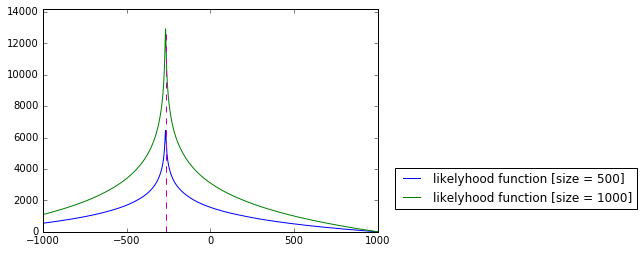

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# экстремумы логарифма функции правдоподобия совпадают
# с экстремумами самой функции в силу монотонности логарифма
def lnlikef(xv, x0 , size) :
    prob = 0
    for i in range(size) :
        prob -= math.log((xv[i] - x0) ** 2 + 1)
    return prob

sample = []
file_name = '496 Зотов Алексей.txt'
with open(file_name) as f:
    for line in f:
        sample += [float(line[:-1])]
        
def calc_evl(size , colors):
    maxx0 = -1e9
    maxval = -1e10
    minval = 1.0
    segment_bound = 1000
    step = 0.01
    OX = np.arange(-segment_bound,segment_bound + step, step)
    lnlikef_res = np.zeros(len(OX))
    for i in range(len(OX)) :
        lnlikef_res[i] = lnlikef(sample , OX[i] , size)
        minval = min(lnlikef_res[i],minval)
        if lnlikef_res[i] > maxval :
            maxval = lnlikef_res[i]
            maxx0 = OX[i]
    for i in range(len(OX)) :
            lnlikef_res[i] -= minval

    plt.axis([-segment_bound, segment_bound, 0 , maxval - minval + (maxval - minval)/10.0 ])
    plt.plot(OX, lnlikef_res,colors[0] , label = "likelyhood function [size = " + str(size) + "]")
    plt.plot([maxx0 , maxx0] , [0 , maxval - minval] , colors[1])
    return maxx0

mmax2 = calc_evl(len(sample) // 2, ['b', 'r--'])
mmax1 = calc_evl(len(sample), ['g', 'm--'])


print("argmax[n : N] = " +  str(round(mmax1,2)))
print("argmax[n : N/2] = " +  str(round(mmax2,2)))
plt.legend(loc=(1.05,0.1))
plt.show()

